## Cora Dataset
Cora is a scientific paper citation network of 2708 publications, where each node is a paper and each connection is a reference. Each publication is descried as a binary vector of 1433 unique words (bag of words). The goal is to clssify the category the paper belongs to.

<img src="CoraBalloons.png" atl="cora">
<!-- <img src="cora.png" atl="cora2"> -->

In [6]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx 
from torch_geometric.utils import to_networkx
import pandas as pd
import numpy as np

## Exploring Graph Data

In [26]:
# loading cora dataset
dataset = Planetoid(root=".", name="Cora")
# access the first graph
data = dataset[0]

print(f'Dataset: {dataset}')
print(f'-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'{data}')
print(f'Number of nodes: {data.x.shape[0]}') # using shape to check dimenstion row is nodes and col is features
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


print(f'Graph:')
print(f'-------------------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')


print(f'-------------------')
print(f'Tensor:')
print(f'Features of first 3 nodes (publication papers)\n {data.x[:3]}')
print(f'First 5 edges\n {data.edge_index[:, :5]}')
print(f'label of 5 node\n {data.y[:10]}')


Dataset: Cora()
-------------------
Number of graphs: 1
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of features: 1433
Number of classes: 7
Graph:
-------------------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False
-------------------
Tensor:
Features of first 3 nodes (publication papers)
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
First 5 edges
 tensor([[   0,    0,    0,    1,    1],
        [ 633, 1862, 2582,    2,  652]])
label of 5 node
 tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2])


## Inspect data as tabular data

In [8]:
df = pd.DataFrame(data.x.numpy())
df['label'] = pd.DataFrame(data.y)
df

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Calculating node degrees

- The high degrees nodes (important nodes) show they have more connection to other node which is papers. The papers has many connection also means it being cited by many other papers as well
- Average degree is 3.9 is relatively low
- Use Cumulative Distribution Function to show the cumulative frequency of nodes if a node degree is less than or equal to a certain nodes degrees 

Average node degree: 3.90
Connection pairs:


,0
0,3
1,3
2,5
3,1
4,5
...,...
2703,1
2704,1
2705,1
2706,4


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


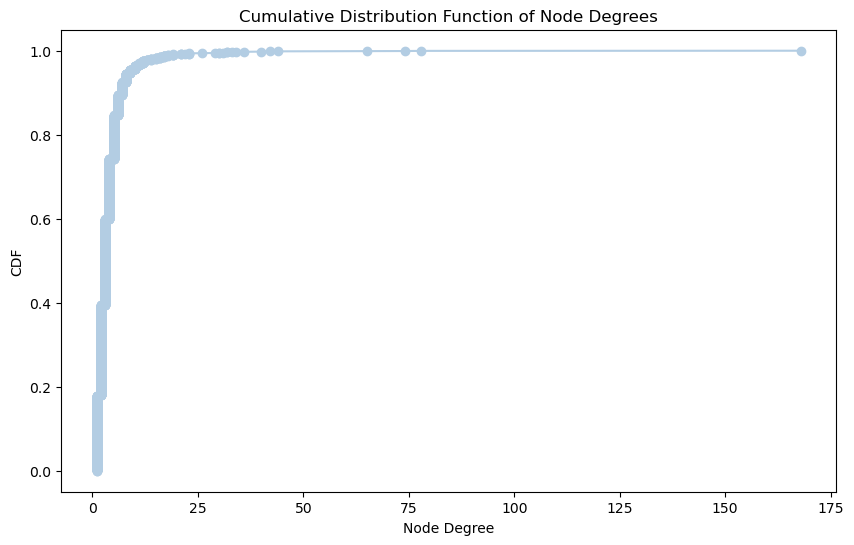

In [9]:

average_node_degree = data.num_edges / data.num_nodes
print(f"Average node degree: {average_node_degree:.2f}")


G = to_networkx(data, to_undirected=True)
degrees = []
for i, node in G.degree():
    degrees.append(node)
# Calculate the CDF of node degrees
sorted_degrees = np.sort(degrees)  # Sort the degrees in ascending order
cdf = np.arange(1, len(sorted_degrees)+1) / len(sorted_degrees)  # Calculate the CDF 

print(f"Connection pairs:")
display(pd.DataFrame(pd.Series(degrees)))
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))


# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_degrees, cdf, marker='o', linestyle='-', color='#b3cde3')
plt.xlabel('Node Degree')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Node Degrees')
plt.show()


## Visualizing the Network - NetworkX

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


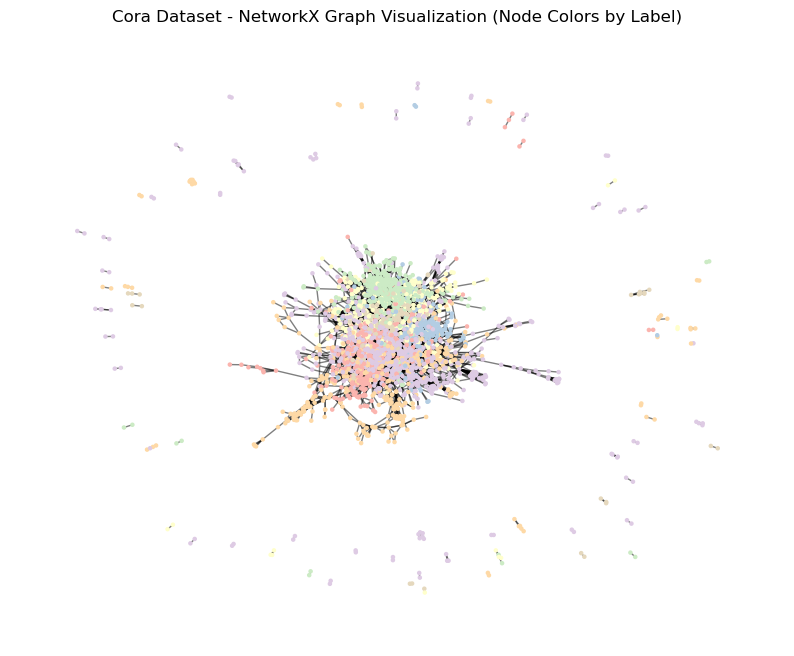

In [10]:

# tranpose = data.edge_index.T
# print(tranpose)

adj = data.edge_index
print(adj)
features = data.x
# print(features)
labels = data.y
# print(labels)

node_color = []
colorlist = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd']
for label in labels:
    node_color.append(colorlist[label])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=5, node_color=node_color)

# Use a lighter alpha for edges
nx.draw_networkx_edges(G, pos, width=1, alpha = 0.5)  

plt.title("Cora Dataset - NetworkX Graph Visualization (Node Colors by Label)")
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


In [11]:
y_labels_dummy = [
    'Case Based',
    'Genetic Algorithms',
    'Neural Networks',
    'Probabilistic Methods',
    'Reinforcement Learning',
    'Rule Learning',
    'Theory'
]

## Single hidden layer with single perceptron

### Note: 
- <b>Objective function known as cost/loss function:</b> Goal is to minimize to measures how well the model is performing and then adjusting the model parameters to improve performance

- <b>For regression</b>(predict continuous values) the objective functions is MSE or (MAE): measure the difference between the predicted values and the actual values.

- <b>For classification problems</b> (logistic regression), where the task is to categorize inputs into two or more classes. The OF is Cross-Entropy Loss (for binary or multiclass classification): measure the difference between the predicted class probabilities and the actual class labels

- <b>Binary:</b> Outout layer is applying the sigmoid func to obtain the prob, then applying step func as threshold to make a final classification decision. The common threshold is 0.5:
    - σ(z)≥0.5 (positive class: 1)
    - σ(z)<0.5 (negative class: 0)

- <b>Multiclass:</b> Output layer is applying softmax func to predicted class probabilities

- <b>Gradient decent equation:</b> xnew(k+1) = x(old) - lr*gradient (the gradient of the loss function with respect to the parameters)
    - Goal: minimize the loss func by moving in the direction of the slope to decrease the loss

- argmax: convert softmax prob to class prediction: take the highest prob 

- https://machinelearningmastery.com/why-initialize-a-neural-network-with-random-weights/

In [28]:
from sklearn.model_selection import train_test_split
features = data.x
print(features)
labels = data.y
print(labels)

# split data into train and test
x_train, y_train, x_test, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([3, 4, 4,  ..., 3, 3, 3])


In [31]:
# Define accuracy metric as the number of correctly predicted results / total numbe of samples
def accuracy(y_true, y_pred):
    # has to compare each pred with actual label on each sample
    return np.sum(y_true == y_pred)/ len(y_true)
    
class multilabel():
    # default constuctor of class:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Simple random initialization techniques

        # Initialize w and b for the input to hidden
        self.weight1 = np.random.randn(input_dim, hidden_dim) * 0.01        
        self.bias1 = np.zeros((1, output_dim))

        # Initialize w and b for the hidden to output
        self.weights2 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.bias2 = np.zeros((1, output_dim))
    
    def activation_sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def activation_softmax(self, z):
        e_x = np.exp(z - np.max(z))
        return e_x / np.sum(e_x, axis=0)
    
    # feedforward to cal weighted sum as linear equation xw+b and pass in activation func
    def forward(self, x): # shape: x=[2708, 1433]

        # Input to hidden
        z1 = np.dot(x, self.weight1) + self.bias1
        a1_sigmoid = self.activation_sigmoid(z1) # squash the linear combination of input into activation sigmoid (-1 and 1)

        # Hidden to output
        z2 = np.dot(a1_sigmoid, self.weight2) + self.bias2
        # output pass through the softmax which convert output to probability between 0 and 1
        softmax_output = self.activation_softmax(z2) # sum the result of softmax should be equal to 1
        return softmax_output
    
    # categorical cross-entropy into 0-6 with one-hot
    # Goal is to minimize the loss on min[j(theta) = 1/n sum(i=1 to n) of L(f(y_pred), y_true)] : distance between predict and true
    def calculate_cross_entropy_loss(self, y_pred, y_true):
        # help y_pred doesn't contain 0 to avoid log(0)
        y_pred = np.clip(y_pred, 1e-10, 1-1e-10)
        # multi class cross-entropy
        loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
        return loss
    

    def backward(self, x, y_true, y_pred):
        # Cal gradient of cross entropy loss with respect to output of softmax by partial derivative
        error = y_pred - y_true

        # Calculate gradient of loss with respect to weights and bias
        # weight: dot product of the input and the error
        # bias: sum of error
        grad_weight = np.dot(x.T, error)/ len(y_true)
        grad_bias = np.sum(error)/ len(y_true)

        return grad_weight, grad_bias
    
    # Training process
    def fit(self, x_train, y_train, x_val, y_val, epochs=100, lr=0.01):
        for epoch in range (epochs):
            # OOP: self.method_name(arguments): calling/access another method within the same class instance
            
            #----------FW pass on TRAINING data-----------
            y_pred_train = self.forward(x_train)

            # Cal the train loss
            loss = self.calculate_cross_entropy_loss(y_pred_train, y_train)

            # Backpropagation to get gradients
            grad_weight, grad_bias = self.backward(x_train, y_train, y_pred_train)

            # Update weight and bias by gradient 
            self.weight -= lr * grad_weight
            self.bias -= lr * grad_bias

            # Cal accuracy on the training set
            predict_classes_train = np.argmax(y_pred_train, axis=1) # output from argmax
            train_acc = accuracy(y_train, predict_classes_train)


            #----------FW pass on VALIDATION data-----------
            y_pred_val = self.forward(x_val)
            val_loss = self.calculate_cross_entropy_loss(y_pred_val, y_val)

            # Cal accuracy on the validation set
            predict_classes_val = np.argmax(y_pred_val, axis=1) 
            val_acc = accuracy(y_val, predict_classes_val)

            # Print the loss every 10 epochs
            if epoch % 10 == 0:
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {train_acc*100:>5.2f}% | Validation Loss: {val_loss:.2f} | Validation Acc: {val_acc*100:.2f}%')

        
    # Testing process
    def test(self, x_test, y_test):
        #----------FW pass on TEST set-----------
        y_pred_test = self.forward(x_test)
        test_loss = self.calculate_cross_entropy_loss(y_test, y_pred_test)

        # Cal accuracy on the test set
        pred_class_test = np.argmax(y_pred_test, axis=1)
        test_acc = accuracy(y_test, pred_class_test)

        print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')


In [33]:
neuron = multilabel(x_train, 10, y_train)

print(neuron)


TypeError: only integer tensors of a single element can be converted to an index

## Single hidden layer MLP

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

# Accuraccy used in classification
# Define accuracy metric as the number of correctly predicted results / total numbe of samples
# example: 
# y_true=[0,1,1,0] (first image is cat and second is dog,...)
# y_hat=[0,1,0,0]  
# have 2 correct out of 4 -> accuracy = 2/4=1/2=50%
def accuracy(y_pred, y_true):
    # has to compare each pred with actual label on each sample like 0-0, 1-1 then sum all the TRUE value
    return torch.sum(y_pred == y_true) / len(y_true)

# The artificial neural netwrok without topological data (graph:relattionshp and connection)
# using pytprch modules as base class without implitcity initialize weight and bias
class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h) # input layer -> hidden layer
        self.linear2 = Linear(dim_h, dim_out) # hidden layer -> output layer

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1) # Softmax layer to convert output to probability between 0 and 1
    
    # Training function
    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss() # Use cross entropy loss as loss function
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4) # Use Adam optimizer

        # main training loop
        self.train() # Set the model in tranining mode
        for epoch in range(epochs+1):
            optimizer.zero_grad() # Clear the gradients
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask]) # calculate the loss between output and ground truth
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward() # Back propogate the loss
            optimizer.step() # Gradient descent

            # Print the stats every 20 epochs
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [ ]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)


In [ ]:
mlp.fit(data, epochs=100)

Epoch   0 | Train Loss: 1.958 | Train Acc: 14.29% | Val Loss: 1.96 | Val Acc: 11.40%
Epoch  20 | Train Loss: 0.089 | Train Acc: 100.00% | Val Loss: 1.40 | Val Acc: 53.60%
Epoch  40 | Train Loss: 0.011 | Train Acc: 100.00% | Val Loss: 1.54 | Val Acc: 50.60%
Epoch  60 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 1.52 | Val Acc: 50.00%
Epoch  80 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.42 | Val Acc: 52.40%
Epoch 100 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.39 | Val Acc: 53.00%


In [ ]:
acc = mlp.test(data)
print(f'MLP test accuracy: {acc*100:.2f}%')

MLP test accuracy: 54.00%
